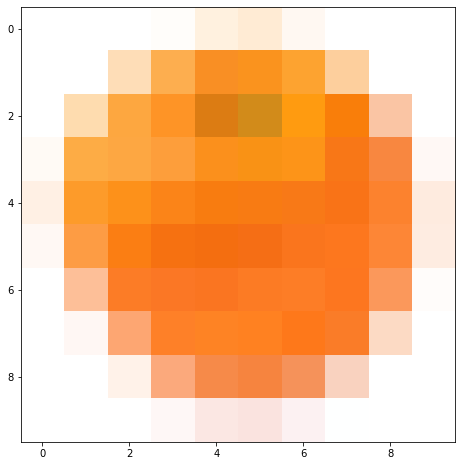

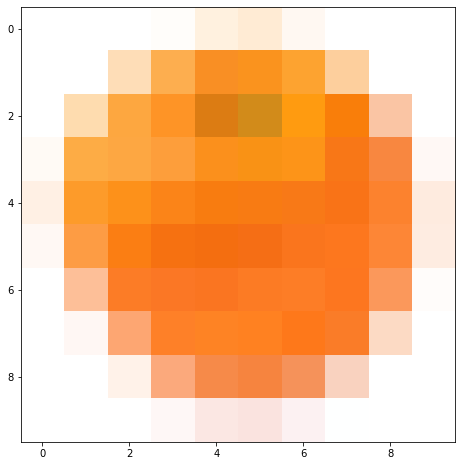

In [80]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import figure


#Define Arnold's cat map function
def Arncatmap(M,N): 
    #take number of iterations M, and pixel width/length N of square image 
    
    image=Image.open('D:/Downloads/orange.jpg').resize((N,N)) #read in image and resize to NxN
    image= np.asarray(image) #Convert to npy array
    oldim=image #variable which will hold image from previous iteration 
    if M==0: #case of no iterations
        return image
    for i in np.arange(0,M): #loop through number of iterations
        newim=np.zeros((N,N,3),dtype=np.uint8) #empty array for new image
        for x in np.arange(0,N): #loop through x
            for y in np.arange(0,N): #loop through y
                newx= (x+y)%N #Apply transforms
                newy= (x+2*y)%N
                newim[newy,N-newx-1]=oldim[y,N-x-1] #create new image from old image
        oldim=newim #set the new old image for another iteration
    return newim

def find_og_img(N):
    #Takes in pixel width/length N of square image
    image=Image.open('D:/Downloads/orange.jpg').resize((N,N))
    image= np.asarray(image)
    for i in np.arange(1,1000):
        if np.all(Arncatmap(i,N)==Arncatmap(0,N))==True:
            return i #returns number of iterations until the transformed image is equal to the original image
        if i==999:
            return(str('Mission failed')) #Returns this if fails


# for i in [10,32,124]: #Check the N values that we care about
#     print('Number of runs to return to original image for '+str(i)+'*'+str(i)+' case:'+str(find_og_img(i)))

    
figure(1,figsize=(8,8))
plt.imshow(Arncatmap(0,10))

figure(2,figsize=(8,8))
plt.imshow(Arncatmap(30,10))